# Guía 6 - Ejercicio 3 
En este ejercicio se carga la imagen de células y se le aplica ruido gaussiano e impulsivo. Luego, se prueba la efectividad de los diferentes pre-procesamientos de ruido vistos en teoría y se obtiene una medida cuantitativa de cual es mejor. En estas pruebas obtuvimos que el mejor filtro para este tipo de ruido e imagen es el filtro de media alfa-recortado.

In [7]:
import numpy as np
from scipy.ndimage import median_filter, generic_filter
import cv2 as cv
import matplotlib.pyplot as plt

def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

def filtro_mediana(imagen, size):
    filtered_imagen = median_filter(imagen, size=size)
    return filtered_imagen

def ruido_sal_y_pimienta(image, sal_prob, pimienta_prob, sal_nivel, pimienta_nivel):
    row, col = image.shape
    imagen_ruidosa = image.copy()
    
    mascara_sal = np.random.random((row, col)) < sal_prob
    mascara_pimienta = np.random.random((row, col)) < pimienta_prob

    imagen_ruidosa[mascara_sal] = sal_nivel
    imagen_ruidosa[mascara_pimienta] = pimienta_nivel
    return imagen_ruidosa

def ruido_gaussiano(shape, media=0, desviacion_estandar=10):
    fila, columna = shape
    
    ruido_gaussiano = np.random.normal(media, desviacion_estandar, (fila, columna))
    
    ruido_gaussiano = ruido_gaussiano - np.mean(ruido_gaussiano)
    return ruido_gaussiano

def filtro_punto_medio(image, kernel_size):
    def midpoint(values):
        return (np.min(values) + np.max(values)) / 2

    return generic_filter(image, midpoint, size=kernel_size)

def filtro_media_alfa_recortado(imagen, size, d):
    def alpha_trimmed_mean(values, d):
        sorted_values = np.sort(values)
        trimmed_values = sorted_values[d:-d]
        return np.mean(trimmed_values)

    filtered_image = generic_filter(imagen, alpha_trimmed_mean, size=size, extra_keywords={'d': d})
    return filtered_image

imagen = cv.imread('Imagenes/sangre.jpg', cv.IMREAD_GRAYSCALE)

MSE ruido: 1110.8673999349285
MSE mediana: 235.66863844920474
MSE punto medio: 458.79809466366197
MSE alfa recortado: 192.20298648350885
MSE mediana punto medio: 245.61315385562935


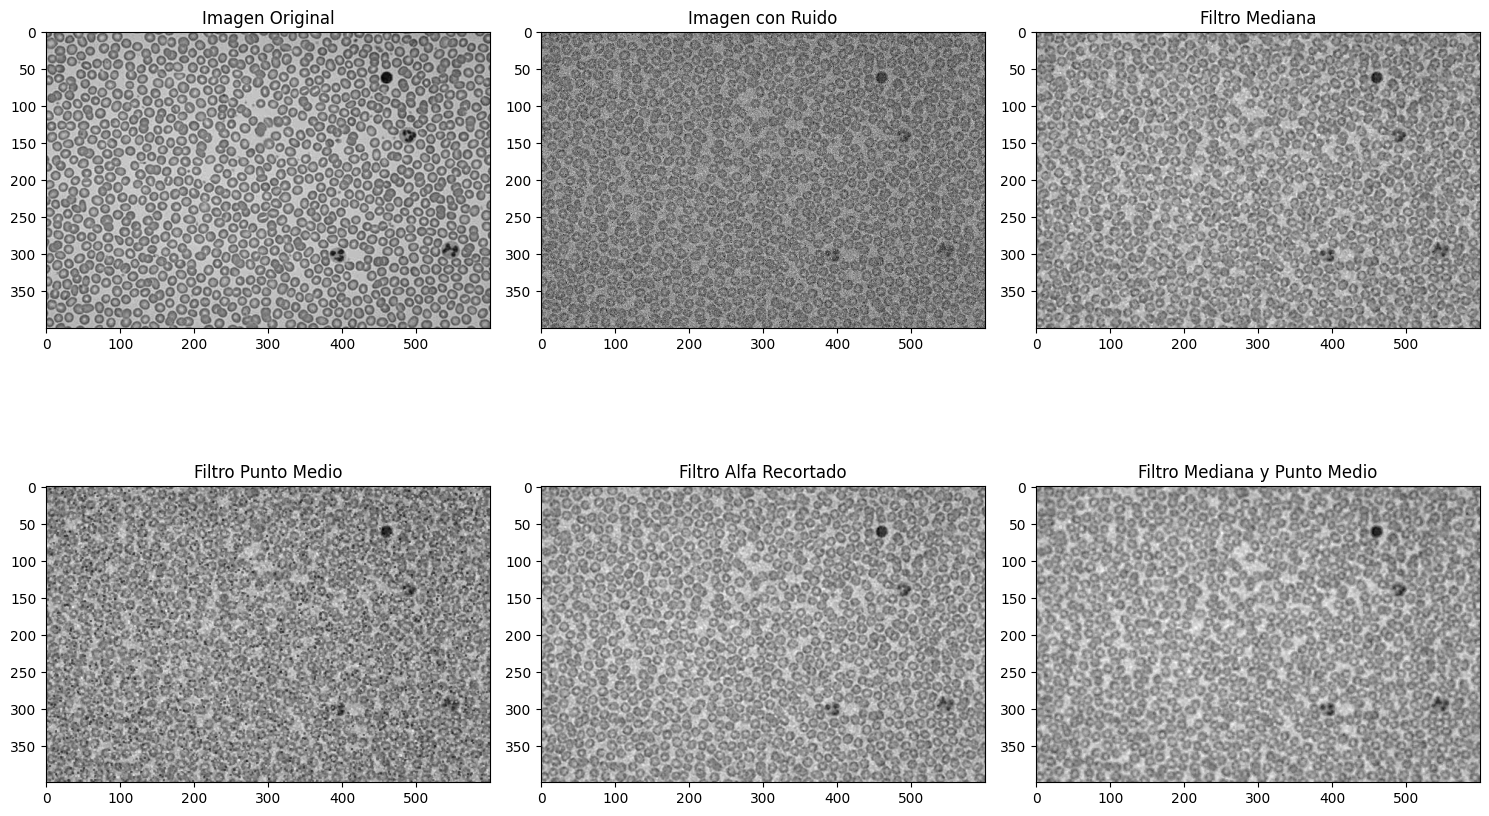

In [8]:
media = 0
stdv = 30
ruido_gaussiano = ruido_gaussiano(imagen.shape, media, stdv)

imagen_ruido_gauss = imagen + ruido_gaussiano
imagen_ruido = ruido_sal_y_pimienta(imagen_ruido_gauss,0.01, 0.005, 255, 0)

imagen_filtro_mediana = filtro_mediana(imagen_ruido, size=(3, 3))
imagen_filtro_punto_medio = filtro_punto_medio(imagen_ruido, 3)
imagen_filtro_alfa_recortado = filtro_media_alfa_recortado(imagen_ruido, size=(3, 3), d=2)
imagen_filtro_mediana_punto_medio = filtro_punto_medio(imagen_filtro_mediana, 3)

mse_ruido = mse(imagen,imagen_ruido)
mse_mediana = mse(imagen, imagen_filtro_mediana)
mse_punto_medio = mse(imagen, imagen_filtro_punto_medio)
mse_alfa_recortado = mse(imagen, imagen_filtro_alfa_recortado)
mse_mediana_punto_medio = mse(imagen, imagen_filtro_mediana_punto_medio)

print(f"MSE ruido: {mse_ruido}")
print(f"MSE mediana: {mse_mediana}")
print(f"MSE punto medio: {mse_punto_medio}")
print(f"MSE alfa recortado: {mse_alfa_recortado}")
print(f"MSE mediana punto medio: {mse_mediana_punto_medio}")

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].imshow(imagen, cmap='gray')
axs[0, 0].set_title('Imagen Original')

axs[0, 1].imshow(imagen_ruido, cmap='gray')
axs[0, 1].set_title('Imagen con Ruido')

axs[0, 2].imshow(imagen_filtro_mediana, cmap='gray')
axs[0, 2].set_title('Filtro Mediana')

axs[1, 0].imshow(imagen_filtro_punto_medio, cmap='gray')
axs[1, 0].set_title('Filtro Punto Medio')

axs[1, 1].imshow(imagen_filtro_alfa_recortado, cmap='gray')
axs[1, 1].set_title('Filtro Alfa Recortado')

axs[1, 2].imshow(imagen_filtro_mediana_punto_medio, cmap='gray')
axs[1, 2].set_title('Filtro Mediana y Punto Medio')

plt.tight_layout()
plt.show()